<a href="https://colab.research.google.com/github/MonaRansing/EDA_Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual




 **Project Summary -**

#Pending# 

# **GitHub Link -**

https://github.com/MonaRansing/EDA_Hotel_Booking_Analysis

# **Problem Statement**


**In this project we are going to analyse Hotel Booking dataset. This dataset contains information of city hotel and resort hotel, and includes information of booking time, length of stay, number of adults, children and/or babies, also have information of avaliable parking space, among other thing.**

**The objective of this project is explore and analyse the data to discover important factors regarding Hotels booking and its attributes.**

#### **Define Your Business Objective?**

Analyse the data on Hotel Booking and discover the different factors which affects the booking. 


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


### Dataset Loading

In [3]:
# My drive is mounted here.
from google.colab import drive               
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Hotel booking dataset read using pd.read_csv
working_dataset = '/content/drive/MyDrive/Data Science/Hotel Bookings.csv'
df = pd.read_csv(working_dataset)

### Dataset First View

In [ ]:
#First view of dataset
df.head(5)

In [ ]:
df.tail(5)

### Dataset Rows & Columns count

In [ ]:
df.shape                                # Counting rows and columns in dataframe using shape

### Dataset Information

In [ ]:
df.info()                               #understanding the given information in dataset

In [ ]:
df.describe()                        # Here is total description of dataset

In [ ]:
#Creating the copy of the dataset 
df1 = df.copy()
df1.head()

### Duplicate Values

In [101]:
# Dataset Duplicate Value Count
duplicate_values = df1.duplicated().value_counts()  
duplicate_values

False    87396
True     31994
dtype: int64

Text(0, 0.5, 'Count of Duplicate Values')

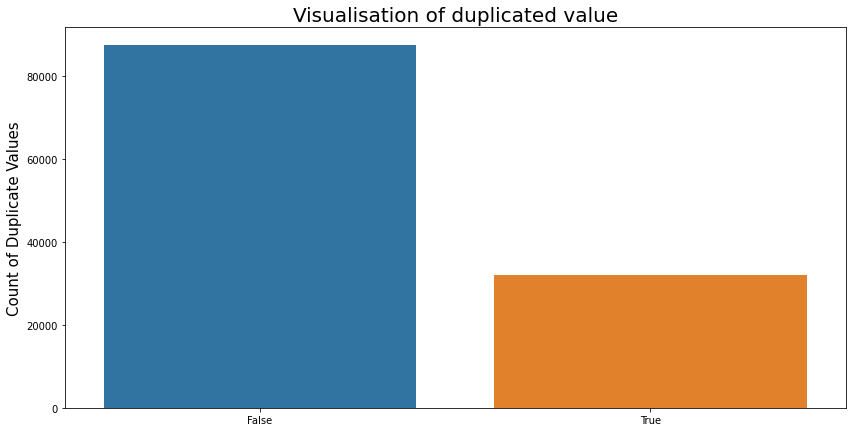

In [102]:
# Visualizing the duplicate values
plt.figure(figsize=(14,7))
sns.countplot(x=df1.duplicated())
plt.title('Visualisation of duplicated value', fontsize = 20)
plt.ylabel('Count of Duplicate Values', fontsize = 15)

In [ ]:
df1 = df1.drop_duplicates()
df1

In [ ]:
df1.shape

### Missing Values

In [110]:
missing_value = df1.isnull().sum().sort_values(ascending=False)[:5]
missing_value

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

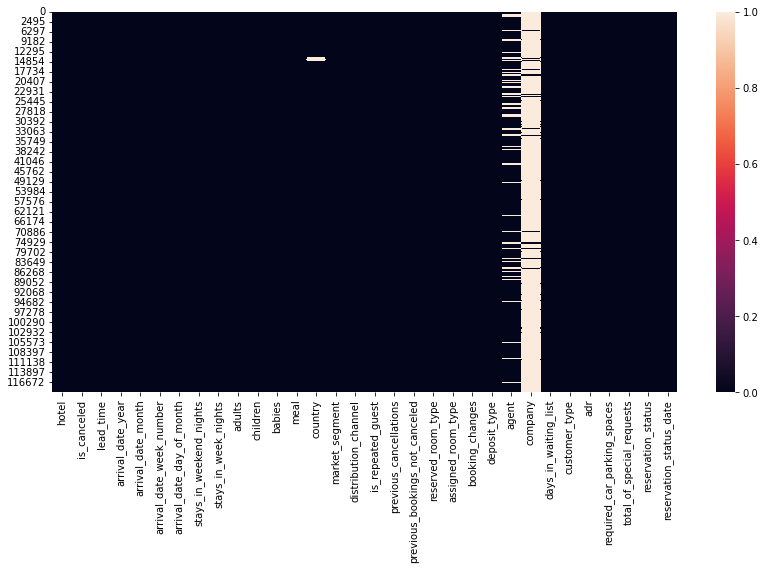

In [115]:
# Visualizing the missing values
plt.figure(figsize=(14,7))
sns.heatmap(df1.isnull())

### What did you know about your dataset?

**The given dataset is of Hotel Booking and we have to analyse and explore this dataset to discover important facrtors which affects the Hotel Booking.
The above dataset has 119390 rows and 32 coulumns.The duplicate value count is 31994 rows and 32 columns. There are 4 columns in dataset which have missing valuse and those columns are company, agent, country and children.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

In [ ]:
# Dataframe after adding columns
df1.head()

In [ ]:
# Dataset Describe
df1.describe(include='all')

### Variables Description 



*  **Hotel:** Type of hotel(City or Resort)
*  **is_cancelled:** If the booking was cancelled(1) or not(0)
*  **lead_time:** Number of days before the actual arrival of the guests
*  **arrival_date_year:** Year of arrival date
*  **arrival_date_month:** Month of arrival date
*  **arrival_date_week_number:** Week number of year for arrival date
*  **arrival_date_day_of_month:** Day of arrival date
*  **stays_in_weekend_nights:** Number of weekend nights(Saturday or Sunday) spent at the hotel by the guests.
*  **stays_in_weel_nights:** Number of weeknights(Monday to Friday) spent at the hotel by the guests.
*  **adults:** Number of adults among the guests
*  **children:** Number of children
*  **babies:** Number of babies
*  **meal:** Type of meal booked
*  **country:** country of the guests
*  **market_segment:** Designation of market segment
*  **distribution_channel:** Name of booking distribution channel
*  **is_repeated_guest:** If the booking was from a repeated guest(1) or not(0)
*  **previous_cancellation:** Number of previous bookings that were cancelled by the customer prior to the current booking
*  **previous_bookings_not_cancelled:** Number of previous bookins not cancelled by the customer prior to the current bookin
*  **reserved_room_type:** Code from room type reserved
*  **assigned_room_type:** Code of room type assigned
*  **booking_changes:** Number of changes made to the booking
*  **deposit_type:** Type of deposite made by the guest
* **agent:** ID of travel agent who made the booking
*  **comapny:** ID of the company that made the booking
*  **days_in_waiting_list:** Number of the days the booking was in the waiting list
*  **customer_type:** Type of customer, assuming one of four categories
*  **adr:** Average daily rate
*  **required_car_parking_spaces:** Number of car parking spaces required bt the customer
*  **total_of_special_requesrs:** Number of special requests made by the customer
*  **reservation_statuse:** Reservation status(Canceled, check-out or no-show)
*  **reservation_status_date:** Date at which the last reservation status was updated


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# We describe all the unique values using lambda fuction of indivisual column.
print(df1.apply(lambda col: col.unique()))

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Here duplicate values are drop which we have already found.
df1 = df1.drop_duplicates()
df1

In [117]:
null_columns=['company','agent','children']
for columns in null_columns:
  df1[columns].fillna(0,inplace=True)

In [119]:
df1['country'].fillna('others',inplace=True)

In [120]:
df1.isna().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

### Adding New Columns

In [122]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as a column
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

### There are some rows with total number of adults, children or babies equal to zero this means there is no any booking were made. So we can remove such rows.###

In [123]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 34)

In [124]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis** ###

#### Chart - 1

1) Which type of hotel is mostly prefered by the guests?

In [41]:
# Chart - 1 visualization code
hotel_value_counts = df1['hotel'].value_counts()
hotel_value_counts

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

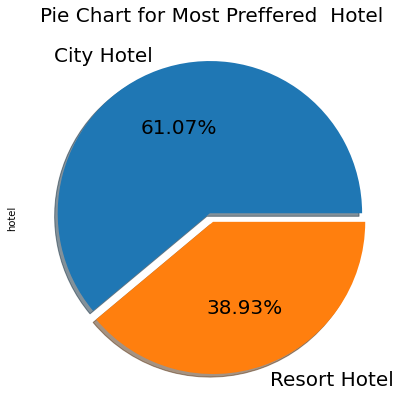

In [42]:
# piechart is used for visualization
hotel_value_counts.plot.pie(explode=[0.03, 0.03], autopct='%1.2f%%', shadow=True, figsize=(10,7),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel',fontsize = 20)

##### 1. Why did you pick the specific chart?

**We use pie chart because pie chart gives simple and easy to understand picture that shows which hotel has more bookings.**

##### 2. What is/are the insight(s) found from the chart?

**We found that city hotel has more bookings which are 61.07% and Resort hotel has less bookings which are 38.93%.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, gained insights help creating a positive business impact.**

**City hotel can find more services to attract more guests to increase more revenue.**

**Resort hotel can find solution to attract guest and also find which facilities provided ny city hotel to attract the guest.**

#### Chart - 2

2) Which agent made the most bookings?

In [43]:
# Chart - 2 visualization code
top_bookings_by_agent = df1['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
top_bookings_by_agent

,agent,num_of_bookings
0,9.0,28721
1,240.0,13028
2,0.0,12141
3,14.0,3342
4,7.0,3294
5,250.0,2779
6,241.0,1644
7,28.0,1493
8,8.0,1383
9,1.0,1228


Text(0.5, 0, 'Agent number')

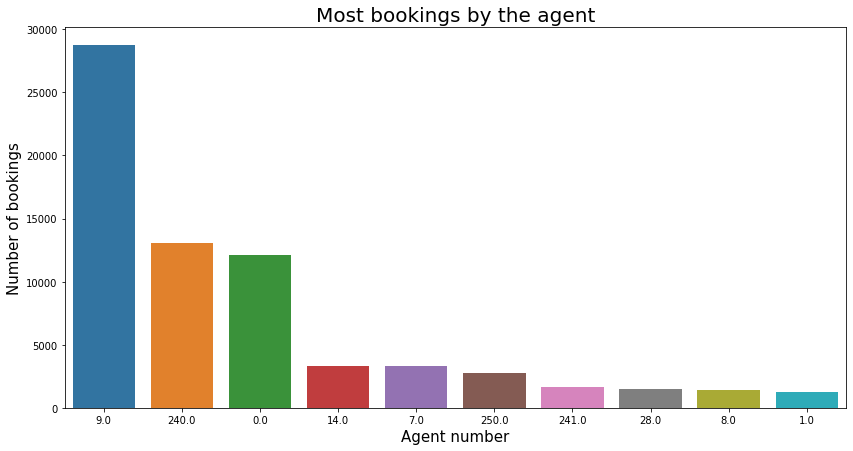

In [44]:
# barplot is used for visualization
plt.figure(figsize=(14,7))
sns.barplot(x=top_bookings_by_agent['agent'],y=top_bookings_by_agent['num_of_bookings'],order=top_bookings_by_agent['agent'])
plt.title('Most bookings by the agent', fontsize=20)
plt.ylabel('Number of bookings', fontsize=15)
plt.xlabel('Agent number', fontsize=15)

##### 1. Why did you pick the specific chart?

**We choose barplot here because it gives data visualization in pictorial form and due to this comparison of data is easy.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found here is Agent no. 9 made most of the bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

****

#### Chart - 3

3) What is the percentage of repeated guests?

In [45]:
# Chart - 3 visualization code
# 1 is for booking made by repeated buest and 0 is for booking not made by repeated guest
repeated_guests_count = df1['is_repeated_guest'].value_counts()
repeated_guests_count

0    83866
1     3364
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Percentage of repeated guests ')

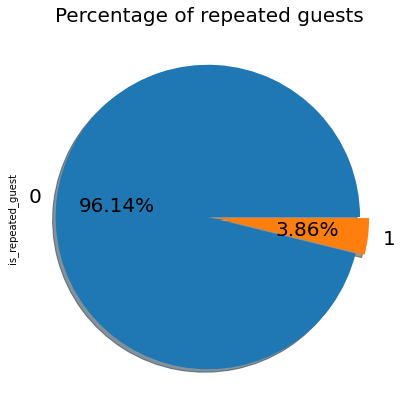

In [46]:
# barplot is used for visaulization
repeated_guests_count.plot.pie(explode=[0.03, 0.03], autopct='%1.2f%%', shadow=True, figsize=(10,7),fontsize=20)
plt.title('Percentage of repeated guests ',fontsize = 20)

##### 1. Why did you pick the specific chart?

**We use pie chart because pie chart gives simple and easy to understand picture that shows how many guests book perticular hotel repetadly.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the chart is there are very few guests booking for the same hotel again.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the gained insights help creating a positive business impact like the hotels which do not booked repetadly by guests can take feedbacks from the guests and try to impove there services.**

#### Chart - 4

4) What is the most prefered room type by the customers?

In [47]:
# Chart - 4 visualization code
room_type = df1['assigned_room_type'].value_counts()
room_type

A    46283
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: assigned_room_type, dtype: int64

Text(0, 0.5, 'Room type count')

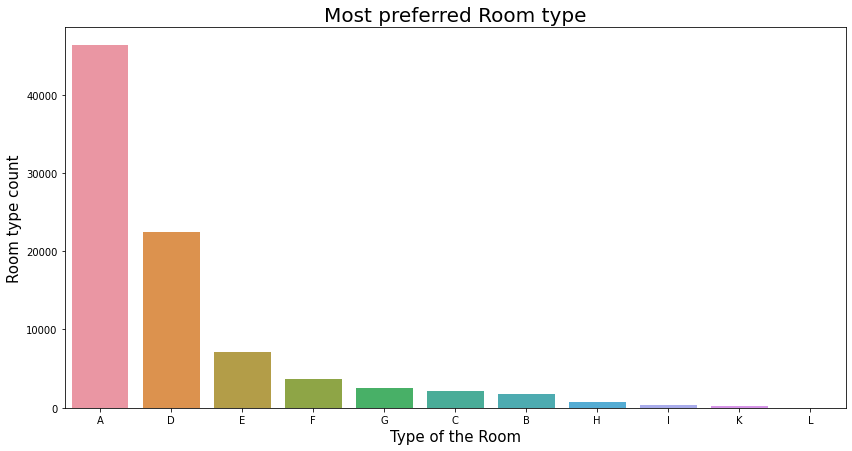

In [48]:
# countlot is used for visualization of most preferred room type
plt.figure(figsize=(14,7))
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
plt.title("Most preferred Room type", fontsize = 20)
plt.xlabel('Type of the Room', fontsize = 15)
plt.ylabel('Room type count', fontsize = 15)

##### 1. Why did you pick the specific chart?

**We have choose countplot to visualize most prefferd roomtype because countplot display the count of each observation for each category and here we have to represent room type vs room type count.**

##### 2. What is/are the insight(s) found from the chart?

**The insighte found from the chart is A type rooms are most prefered rooms and the count is 46283 and after that D type rooms are prefered by the guest and count is 22419.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Hotels can provide those facilities in other room types which provided in room type A**

#### Chart - 5

5) What type of food is mostly prefered by the guests?

In [49]:
# Chart - 5 visualization code
preferred_food = df1['meal'].value_counts()
preferred_food

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0, 0.5, 'Food type count')

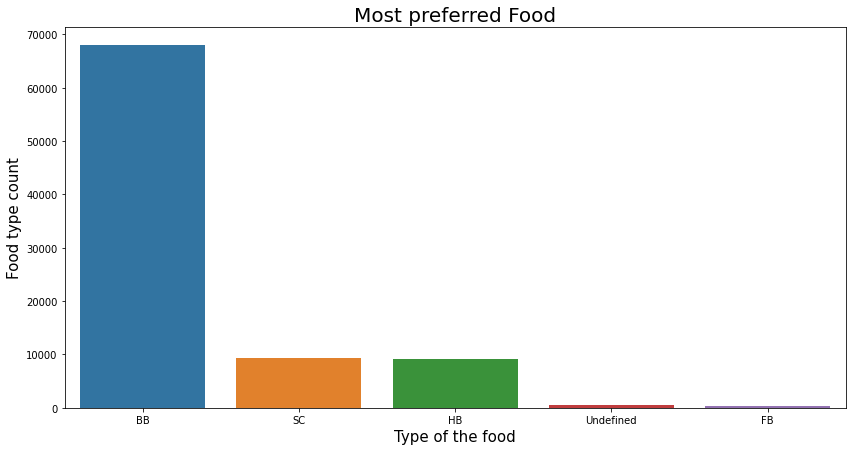

In [50]:
# Visualization of most preferred food using countplot
plt.figure(figsize=(14,7))
sns.countplot(x=df1['meal'],order=df1['meal'].value_counts().index)
plt.title("Most preferred Food", fontsize = 20)
plt.xlabel('Type of the food', fontsize = 15)
plt.ylabel('Food type count', fontsize = 15)

##### 1. Why did you pick the specific chart?

**We have choose countplot to visualize most preferred food because countplot display the count of each observation for each category and here we have to represent food type vs food type count.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found here is BB type food is most preferred.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Using this insight hotels can improve quality of other type of meals.**

#### Chart - 6

6) In which month most of the bookings happened? 

In [51]:
bookings_by_months=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts of booking"})
bookings_by_months

,arrival_date_month,Counts of booking
0,April,7900
1,August,11242
2,December,5112
3,February,6083
4,January,4685
5,July,10043
6,June,7756
7,March,7489
8,May,8344
9,November,4973


In [52]:
# Chart - 6 visualization code
bookings_by_months=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts of booking"})
sequence_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'],categories=sequence_of_months,ordered=True)
bookings_by_months=bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,Counts of booking
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of Bookings')

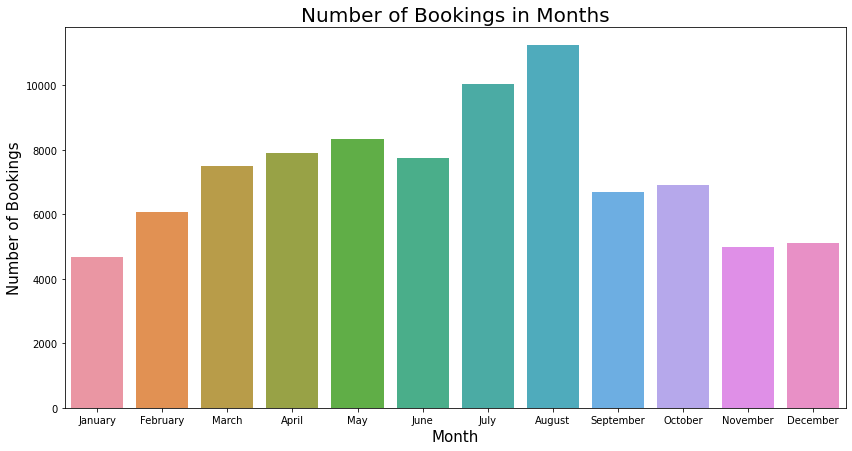

In [53]:
# barplot for visualization of month in which most booking happened.
plt.figure(figsize=(14,7))
sns.barplot(data=bookings_by_months, x="arrival_date_month", y="Counts of booking")
plt.title("Number of Bookings in Months", fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Bookings', fontsize = 15)

##### 1. Why did you pick the specific chart?

**We choose barplot here because it gives data visualization in pictorial form. So comparison becomes easy.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the chart is August month has maximum number of bookings.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

****

#### Chart - 7

7) Which distribution channel is mostly used for hotel booking?

In [54]:
# Chart - 7 visualization code
# distribution channel value count
distribution_channel_counts = df1['distribution_channel'].value_counts()
distribution_channel_counts

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [55]:
#shape of dataframe 
d3 = df1.shape[0]
d3

87230

In [56]:
# distribution channel count in df format
distribution_channel_df = df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})
distribution_channel_df

,distribution_channel,count
0,TA/TO,69028
1,Direct,12954
2,Corporate,5062
3,GDS,181
4,Undefined,5


In [57]:
# booking by distribution channel in percent 
distribution_channel_df_percent = pd.DataFrame(round((distribution_channel_counts/d3)*100,2)).reset_index().rename(columns={'index':'distribution_channel','distribution_channel':'% booking'})
distribution_channel_df_percent

,distribution_channel,% booking
0,TA/TO,79.13
1,Direct,14.85
2,Corporate,5.80
3,GDS,0.21
4,Undefined,0.01


Text(0, 0.5, 'Booking by distribution channel in percent')

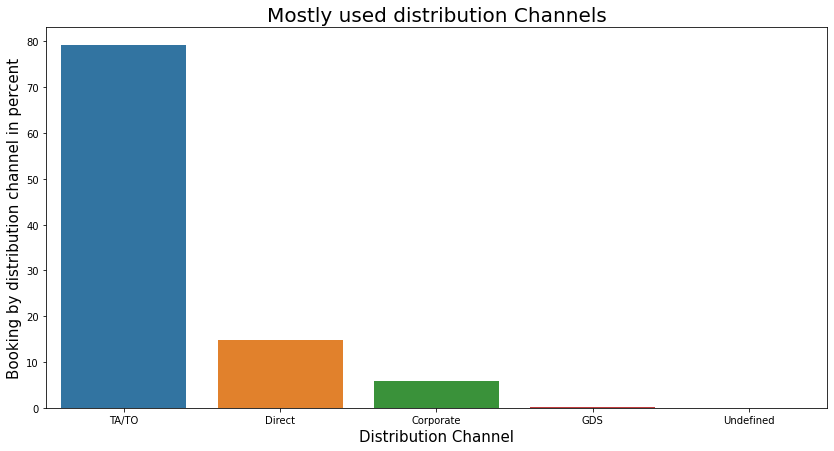

In [58]:
#Visualization of mostly used distribution channels using barplot
plt.figure(figsize=(14,7))
sns.barplot(data=distribution_channel_df_percent, x="distribution_channel", y="% booking")
plt.title("Mostly used distribution Channels", fontsize = 20)
plt.xlabel('Distribution Channel', fontsize = 15)
plt.ylabel('Booking by distribution channel in percent', fontsize = 15)

##### 1. Why did you pick the specific chart?

**Because barplot gives simple and easy to understand pictorial chart.**

##### 2. What is/are the insight(s) found from the chart?

**Mostly used distribution channel is TA/TO channel.The total count of booking is 69028 and booking in percent is 79.13.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This insight help to other channels to improve their services.**

#### Chart - 8

8) which year had highest bookings? 

In [59]:
# Chart - 8 visualization code
year_count = df1['arrival_date_year'].value_counts().sort_index()
year_count

2015    13284
2016    42313
2017    31633
Name: arrival_date_year, dtype: int64

Text(0, 0.5, 'Count of bookings')

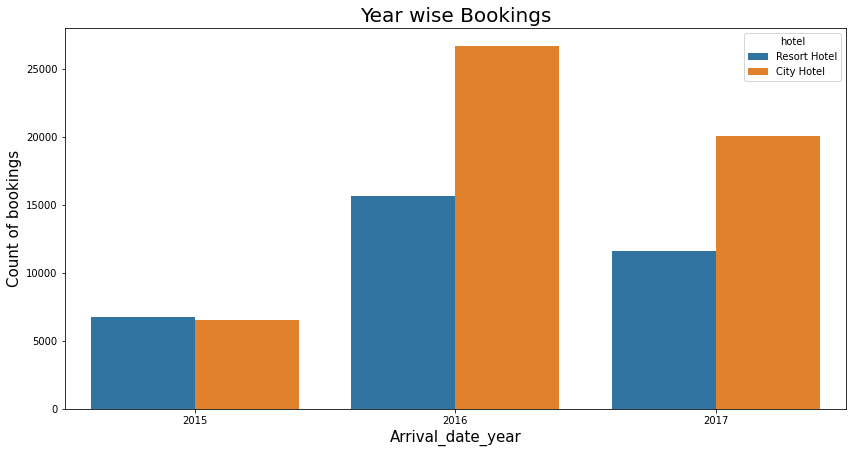

In [60]:
# Visualization of year wise booking using countplot chart
plt.figure(figsize=(14,7))
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title('Year wise Bookings', fontsize = 20)
plt.xlabel('Arrival_date_year', fontsize = 15)
plt.ylabel('Count of bookings', fontsize = 15)

##### 1. Why did you pick the specific chart?

**Because countplot is easy to understand**

##### 2. What is/are the insight(s) found from the chart?

**2016 had highest bookings and 2015 had lowest bookings**

Answer Here

# **Bivariate and Multivariate analysis**

#### Chart - 9

1) Which hotel type has the highest ADR?

In [69]:
# Chart - 9 visualization code
highest_adr = df1.groupby('hotel')['adr'].mean().reset_index()
highest_adr

,hotel,adr
0,City Hotel,111.271969
1,Resort Hotel,99.059517


Text(0, 0.5, 'ADR')

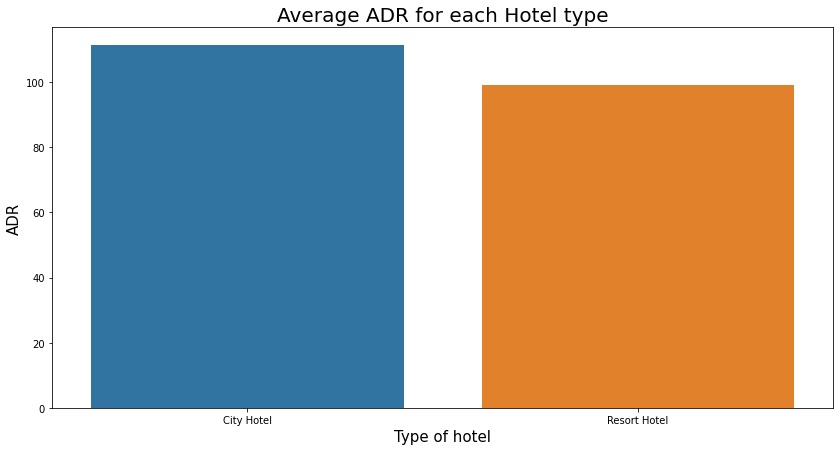

In [73]:
# Visualization of highest adr using barplot
plt.figure(figsize=(14,7))
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])
plt.title('Average ADR for each Hotel type', fontsize=20)
plt.xlabel('Type of hotel',fontsize=15)
plt.ylabel('ADR', fontsize=15)

##### 1. Why did you pick the specific chart?

**I choose bar plot because it gives simple pictirial diagram and it also easy to understand.**

##### 2. What is/are the insight(s) found from the chart?

**The insight found from the chart is City hotel has highest adr that means city hotel generate more revenue.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight is helpful for resort hotel that they can use this insight to increase there revenue.**

#### Chart - 10

2) which hotel has longer waiting time?

In [76]:
# Chart - 10 visualization code
Waiting_time = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
Waiting_time

,hotel,days_in_waiting_list
0,City Hotel,1.020066
1,Resort Hotel,0.316763


Text(0, 0.5, 'Waiting time')

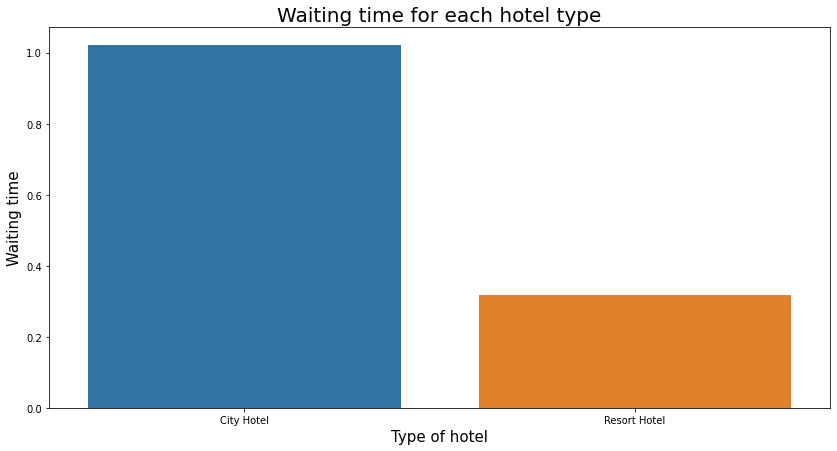

In [77]:
# Visualization of hotel which has longer waiting time by using barplot
plt.figure(figsize=(14,7))
sns.barplot(x=Waiting_time['hotel'],y=Waiting_time['days_in_waiting_list'])
plt.title('Waiting time for each hotel type', fontsize=20)
plt.xlabel('Type of hotel',fontsize=15)
plt.ylabel('Waiting time', fontsize=15)

##### 1. Why did you pick the specific chart?

**I choose barplot bacuase it gives easy to understand pictorial diagram for the visualization of which hotel has longer waiting time.**

##### 2. What is/are the insight(s) found from the chart?

**I found that city hotel has longer waiting time.Therefore city hotel is much busier than Resort hotel.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight create positive impact on buisiness of resort hotel.**

**Resort hotel need to increase their facilities so that their bookings increases.**

#### Chart - 11

3) Which distribution channel contributed more to adr in order to increase the the income?

In [80]:
# Chart - 11 visualization 
distribution_channel = df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()
distribution_channel

,distribution_channel,hotel,adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


Text(0, 0.5, 'ADR')

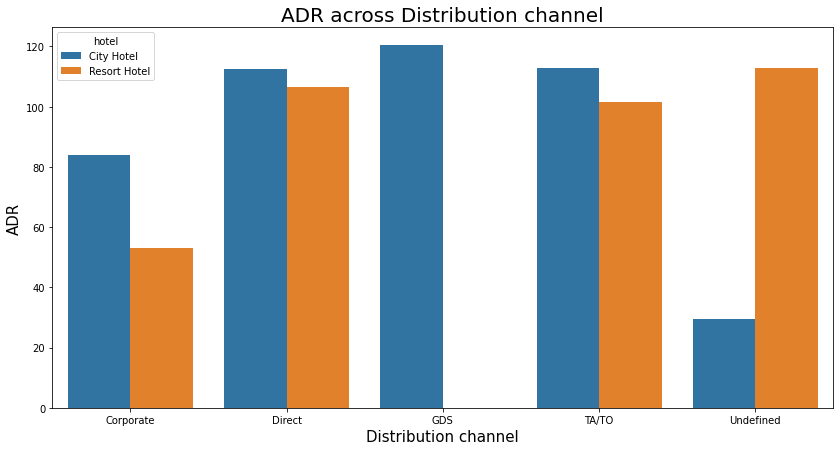

In [81]:
# Visualization of contribution of distribution channel in adr using barplot
plt.figure(figsize=(14,7))
sns.barplot(x='distribution_channel',y='adr', data=distribution_channel,hue='hotel')
plt.title('ADR across Distribution channel', fontsize=20)
plt.xlabel('Distribution channel',fontsize=15)
plt.ylabel('ADR', fontsize=15)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
df1.head(2)

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation of the columns')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***